Linear Regression    → RMSE: 3956.11, R²: 0.37
Decision Tree        → RMSE: 2508.23, R²: 0.75


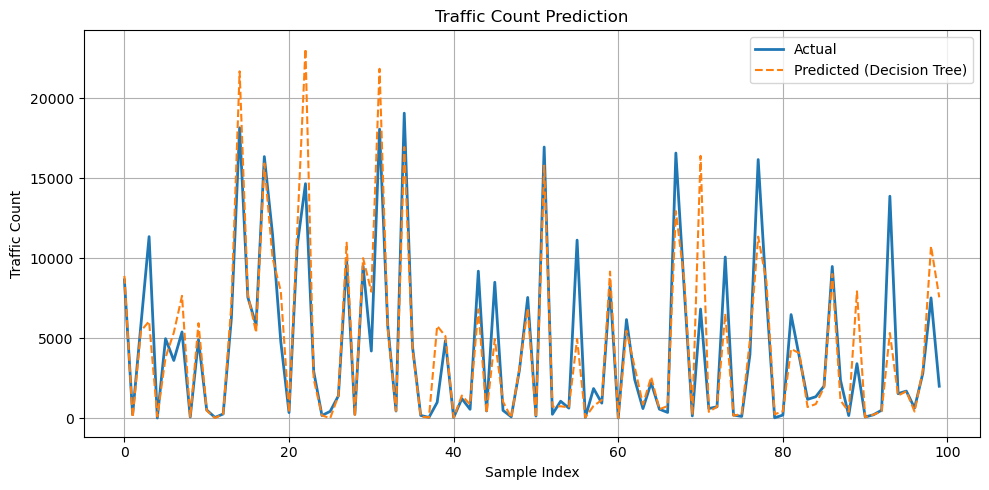

In [8]:
# Machine Learning-Based Road Traffic Volume Analysis
# Author: Sara [Your ID]
# Description: Predicts traffic count using multiple ML models and compares performance

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error


# Load only a sample of rows to reduce memory usage
chunk_size = 10000  
chunks = pd.read_csv('traffic_volume_dataset.csv', chunksize=chunk_size, low_memory=False)

# Combine only the first few chunks (e.g., 3 chunks = ~30,000 rows)
df = pd.concat([chunk for _, chunk in zip(range(3), chunks)], ignore_index=True)


# Convert startDate to datetime format
df['startDate'] = pd.to_datetime(df['startDate'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['startDate'])  # Drop rows with invalid dates

# Extract date features
df['day'] = df['startDate'].dt.day
df['month'] = df['startDate'].dt.month
df['year'] = df['startDate'].dt.year

# Drop non-numeric or descriptive columns
df = df.drop(['startDate', 'regionName', 'siteDescription', 'siteReference'], axis=1)

# Encode classWeight only (low cardinality)
df = pd.get_dummies(df, columns=['classWeight'], drop_first=True)

# Downcast numeric columns to reduce memory usage
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')

# Optional: sample data to reduce memory load
df_sample = df.sample(frac=0.3, random_state=42)  # Use 30% of data

# Define features and target
X = df_sample.drop(['trafficCount'], axis=1)
y = df_sample['trafficCount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define lightweight models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name:<20} → RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Visualize best model
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(y_pred_best[:100], label=f'Predicted ({best_model_name})', linestyle='--')
plt.title('Traffic Count Prediction')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
